# Second LSN Excercise Lesson

## Excercise 2.1

In this excercise we were asked to evaluate $\int_{0}^{1} \frac{\pi}{2}cos\big(\frac{{\pi}x}{2}\big)dx$, utilizing a uniform distibution sampling ($p(x)=1$) and the importance sampling technique. <br> The first graph shows the evaluation via uniform distribution sampling, while the second shows the imporance sampling one. For the importance sampling method we decided to use the straight line connecting $(0, \frac{\pi}{2})$ to $(1,0)$ as the probability function $p(x)$. Since $p(x)$ needs to be normalized we ended up using $p(x)=-2x+2$. With that said, following what's in the second theoretical lesson, the integrand function to be evaluated becomes $\frac{\pi}{2}\frac{cos(\frac{{\pi}x}{2})}{-2x+2}$. <br> To sample p(x), we inverted its cumulative function, being careful to choose the appropriate inverse, which is $y=1-\sqrt{1-x}$, where x is uniformly distributed in $[0,1)$. <br> As we expected, the importance sampling technique is more precise than the uniform distrubution sampling.

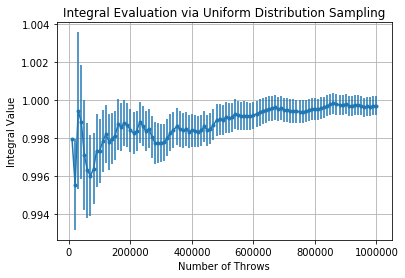

In [20]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

block, I, error = np.loadtxt("st_sample.dat", usecols=(0,1,2), delimiter=";", unpack='true')
plt.errorbar(block,I,yerr=error,marker=".")
plt.title("Integral Evaluation via Uniform Distribution Sampling")
plt.xlabel('Number of Throws')
plt.ylabel('Integral Value')
plt.grid(1)
plt.show()

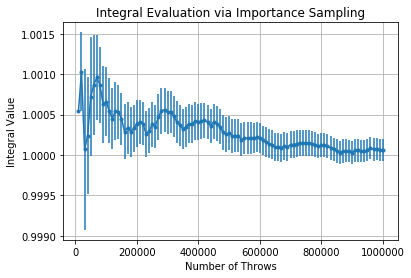

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

block, I, error = np.loadtxt("imp_sample.dat", usecols=(0,1,2), delimiter=";", unpack='true')
plt.errorbar(block,I,yerr=error,marker=".")
plt.title("Integral Evaluation via Importance Sampling")
plt.xlabel('Number of Throws')
plt.ylabel('Integral Value')
plt.grid(1)
plt.show()

## Excercise 2.2

Excercise 2.2 is about random walks. The first graph shows the mean distance from the origin as a function of the number of steps using a discreete lattice and using a step $a$ such that $|a|=1$, taken along he coordinate axes. <br> The second graph shows the same things as the first one but using a continuous lattice; this is done by sampling the steps in spherical coordinates. Both graphs look as expected. We can clearly see that the average distance from the origin follows a law like $f(x)=k\sqrt{x}$, and that's confirmed by the almost perfect fit of a said fuction onto our data. The statistical uncertainity increases as the number of steps increases, that's to be expected since the more random steps and walks you do, the more likely you'll finish on a different point than the previous walk. 

optimized parameters [k] =
[0.93043991]
parameters uncertainty =
[0.00183046]


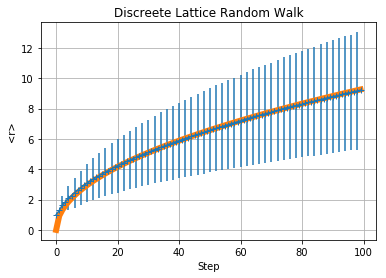

In [18]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

def f(x,k):  # defining the fitting function
    return k * np.sqrt(x)

step, r, error = np.loadtxt("disc.dat", usecols=(0,1,2), delimiter=";", unpack='true')
p_opt, p_cov = curve_fit(f, step, r)
y_fit = f(step,p_opt[0])
plt.errorbar(step,r,yerr=error, errorevery=2, marker="+")
print("optimized parameters [k] =")
print(p_opt)
print("parameters uncertainty =")
print(np.sqrt(np.diagonal(p_cov)))
plt.plot(step,y_fit, linewidth = 6) # plotting fitted function
plt.title("Discreete Lattice Random Walk")
plt.xlabel('Step')
plt.ylabel('<r>')
plt.grid(1)
plt.show()

optimized parameters [k] =
[0.92264309]
parameters uncertainty =
[0.00180752]


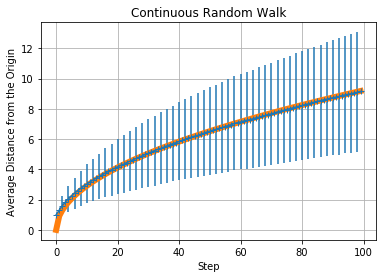

In [19]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

def f(x,k):  # defining the fitting function
    return k * np.sqrt(x)

step, r , error= np.loadtxt("cont.dat", usecols=(0,1,2), delimiter=";", unpack='true')
plt.errorbar(step,r,yerr=error, errorevery=2, marker = "+")
p_opt, p_cov = curve_fit(f, step, r)
y_fit = f(step,p_opt[0])
print("optimized parameters [k] =")
print(p_opt)
print("parameters uncertainty =")
print(np.sqrt(np.diagonal(p_cov)))
plt.plot(step,y_fit,linewidth=6) # plotting fitted function
plt.title("Continuous Random Walk")
plt.xlabel('Step')
plt.ylabel('Average Distance from the Origin')
plt.grid(1)
plt.show()

## Supplementary Material

The graph below shows the distribution of the last step's distance from the origin of $10^4$ random walks. It justifies the fact that the statistical uncertainity of the mean distance increases (and why it's pretty big) as the number of steps and walks increases.

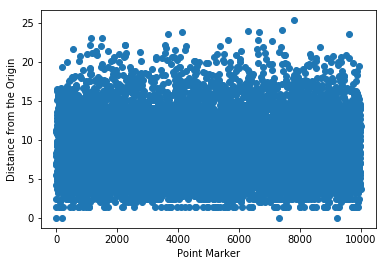

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

i, chi = np.loadtxt("test.dat", usecols=(0,1), delimiter=";", unpack='true')
plt.scatter(i,chi)
plt.xlabel('Point Marker')
plt.ylabel('Distance from the Origin')
plt.show()